In [4]:
import random 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
fashion_train_df=pd.read_csv('train.csv',sep=",")


In [6]:
fashion_test_df=pd.read_csv('test.csv',sep=",")

In [9]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualisation

In [10]:
   fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [11]:
fashion_test_df.shape

(10000, 785)

In [12]:
fashion_train_df.shape

(60000, 785)

In [13]:
training=np.array(fashion_train_df,dtype='float32')

In [14]:
testing=np.array(fashion_test_df,dtype='float32')

4.0

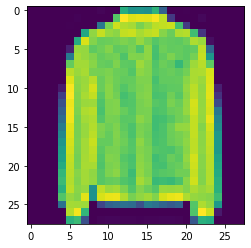

In [16]:
i=random.randint(1,60000)
plt.imshow(training[i,1:].reshape( 28,28))
label=training[i,0]
label

In [17]:
#0-tshirt/top
#1-trouser
#2-pullover
#3-dress
#4-coat
#5-sandal
#6-shirt
#7-sneaker
#8-bag
#9-ankle boot

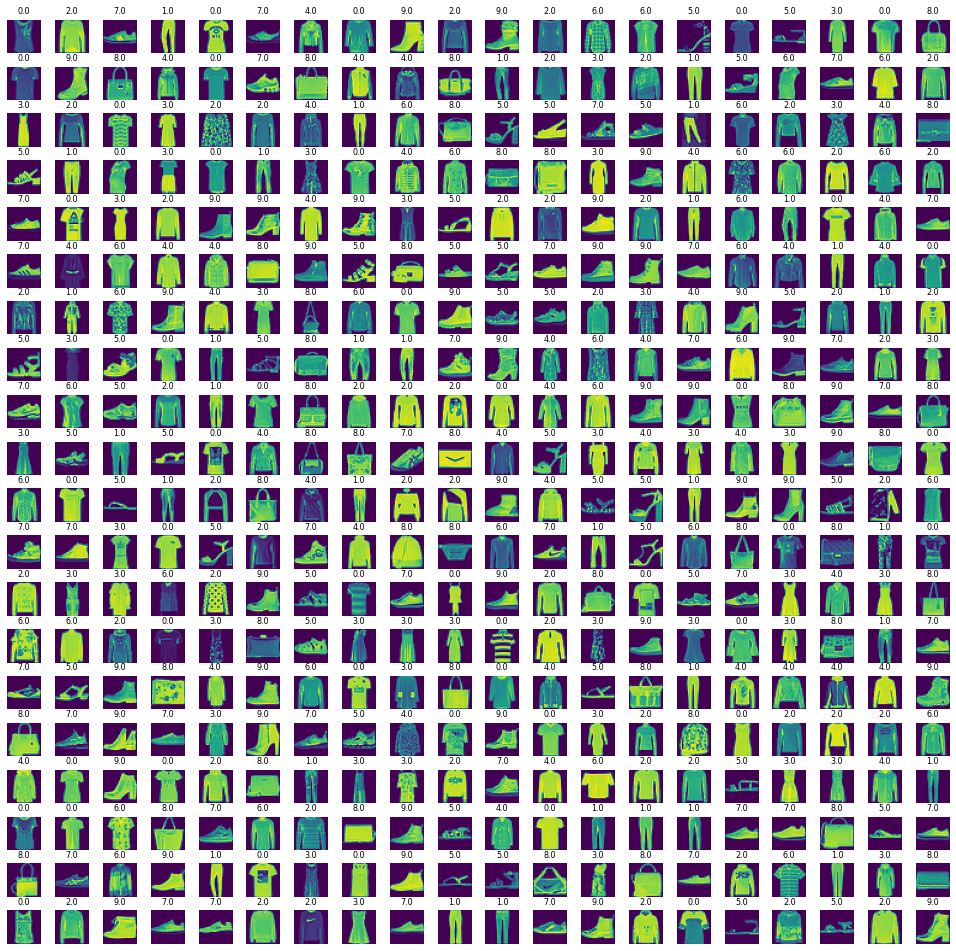

In [18]:
W_grid=20
L_grid=20
fig,axes=plt.subplots(L_grid,W_grid,figsize=(17,17))
axes=axes.ravel()
n_training=len(training)
for i in np.arange(0,W_grid*L_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(training[index,1:].reshape(28,28))
    axes[i].set_title(training[index,0],fontsize=8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# training model

In [20]:
X_train=training[:,1:]/255
y_train=training[:,0]

In [21]:
X_test=testing[:,1:]/255
y_test=testing[:,0]

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_validate, y_train, y_validate = train_test_split(
 X_train, y_train, test_size=0.2, random_state=12345)

In [26]:
X_train=X_train.reshape(X_train.shape[0],*(28,28,1))
X_test=X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate=X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [28]:
X_train.shape

(48000, 28, 28, 1)

In [30]:
X_test.shape

(10000, 28, 28, 1)

In [32]:
X_validate.shape

(12000, 28, 28, 1)

In [37]:
import keras

In [42]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [43]:
cnn_model= Sequential()

In [46]:
cnn_model.add(Conv2D(32, 3, 3, input_shape=(28,28,1),activation='relu'))

In [47]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [50]:
cnn_model.add(Flatten())

In [57]:
cnn_model.add(Dense(32, activation='relu'))

In [58]:
cnn_model.add(Dense(32, activation='sigmoid'))

In [63]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.01),metrics=['accuracy'])

In [64]:
epochs=50

In [65]:
cnn_model.fit(x=X_train,
    y=y_train,
    batch_size=512,
    epochs=epochs,
    verbose=1,
    validation_data=(X_validate,y_validate))

Epoch 1/50
94/94 [==============================] - 7s 19ms/step - loss: 1.8977 - accuracy: 0.4002 - val_loss: 0.6453 - val_accuracy: 0.7486
Epoch 2/50
94/94 [==============================] - 1s 13ms/step - loss: 0.5945 - accuracy: 0.7747 - val_loss: 0.4985 - val_accuracy: 0.8141
Epoch 3/50
94/94 [==============================] - 1s 13ms/step - loss: 0.4702 - accuracy: 0.8274 - val_loss: 0.4363 - val_accuracy: 0.8388
Epoch 4/50
94/94 [==============================] - 1s 13ms/step - loss: 0.4224 - accuracy: 0.8432 - val_loss: 0.4186 - val_accuracy: 0.8466
Epoch 5/50
94/94 [==============================] - 1s 15ms/step - loss: 0.3924 - accuracy: 0.8552 - val_loss: 0.4043 - val_accuracy: 0.8497
Epoch 6/50
94/94 [==============================] - 1s 15ms/step - loss: 0.3786 - accuracy: 0.8569 - val_loss: 0.3923 - val_accuracy: 0.8546
Epoch 7/50
94/94 [==============================] - 1s 14ms/step - loss: 0.3673 - accuracy: 0.8641 - val_loss: 0.3796 - val_accuracy: 0.8588
Epoch 8/50
94

# evaluate

In [66]:
evaluation=cnn_model.evaluate(X_test,y_test)
print("test accuracy:{:.3f}".format(evaluation[1]))

313/313 [==============================] - 0s 955us/step - loss: 0.4074 - accuracy: 0.8761
test accuracy:0.876


In [67]:
predicted_classes=cnn_model.predict_classes(X_test)

C:\Users\Dhriti\anaconda3\envs\torch\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [68]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

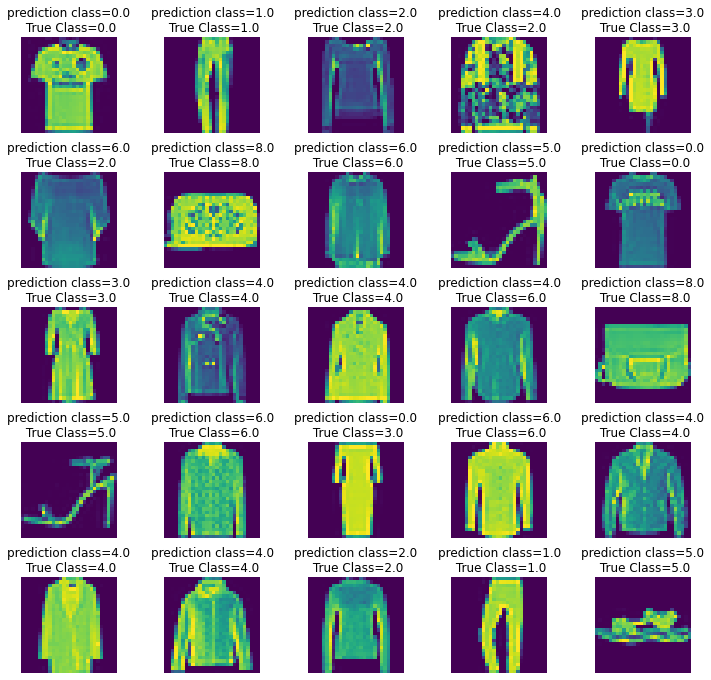

In [74]:
L=5
W=5
fig,axes=plt.subplots (L , W , figsize=(12,12))
axes=axes.ravel()
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("prediction class={:0.1f}\n True Class={:0.1f}".format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

<AxesSubplot:>

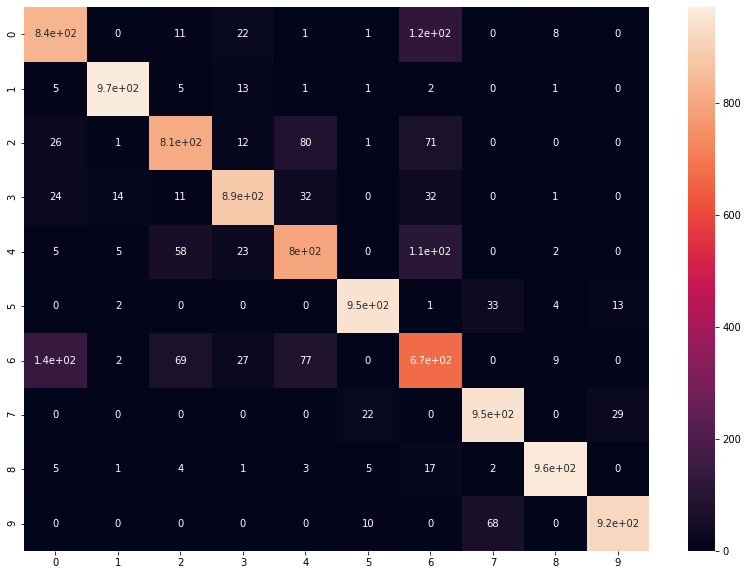

In [76]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted_classes)
plt.figure(figsize=(14,10))
sns.heatmap(cm,annot=True)

In [77]:
from sklearn.metrics import classification_report

num_classes=10
target_names=['Class {}'.format(i) for i in range(num_classes)]
print(classification_report(y_test,predicted_classes,target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.80      0.83      0.82      1000
     Class 1       0.97      0.97      0.97      1000
     Class 2       0.84      0.81      0.82      1000
     Class 3       0.90      0.89      0.89      1000
     Class 4       0.80      0.80      0.80      1000
     Class 5       0.96      0.95      0.95      1000
     Class 6       0.66      0.67      0.66      1000
     Class 7       0.90      0.95      0.92      1000
     Class 8       0.97      0.96      0.97      1000
     Class 9       0.96      0.92      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

